In [56]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns


In [2]:
# Read Dataframe
tmdb_df = pd.read_csv('tmdb_df.csv')

# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Separate the genres to a list
tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')

tmdb_df.shape

(64432, 13)

#### Final Data Cleaning

In [3]:
# Removing rows with missing data
tmdb_df = tmdb_df[tmdb_df['budget'] > 5]
tmdb_df = tmdb_df[tmdb_df['vote_average'] != 0]
tmdb_df = tmdb_df[tmdb_df['revenue'] > 5]
tmdb_df = tmdb_df[tmdb_df['roi'] != 0]
tmdb_df.shape

(2551, 13)

In [4]:
# only 2 TV Movies present, removing
# Remove 'TV Movie' from the list of genres
tmdb_df['genres'] = tmdb_df['genres'].apply(lambda x: [genre for genre in x if genre != 'TV Movie'])

In [5]:
# Drop the extra index column
tmdb_df = tmdb_df.drop('Unnamed: 0', axis=1)

# Verify columns created
tmdb_df.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
0,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,"[Adventure, Drama, Science Fiction]","rescue, future, spacecraft, race against time,...",2014,4.25
1,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,"[Action, Adventure, Comedy]","superhero, anti hero, mercenary, based on comi...",2016,13.50
2,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"[Adventure, Action, Science Fiction]","sacrifice, magic, superhero, based on comic, s...",2018,6.84
3,7.906,26638,2014-07-30,772776600,121,170000000,tt2015381,33.255,"[Action, Science Fiction, Adventure]","spacecraft, based on comic, space, orphan, adv...",2014,4.55
4,8.263,23857,2019-04-24,2800000000,181,356000000,tt4154796,91.756,"[Adventure, Science Fiction, Action]","superhero, time travel, space travel, time mac...",2019,7.87


In [6]:
# 'runtime' filter

# Sort values
tmdb_df = tmdb_df.sort_values('runtime')

# Set 'runtime' limit
tmdb_df = tmdb_df[tmdb_df['runtime'] >= 70]
tmdb_df.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
41185,10.000,1,2013-01-01,5000,70,80000,tt2248981,0.600,[Documentary],artfilm,2013,0.06
17050,6.500,11,2013-07-09,3731,71,150,tt3077530,5.786,"[Animation, Action, Science Fiction]","mutant, based on comic",2013,24.87
5930,6.421,108,2016-01-22,169242,72,170000,tt4238858,4.451,[Drama],"dance, tomboy, woman director",2016,1.00
3537,5.313,264,2019-04-05,44652,72,30000,tt6469548,9.126,"[Horror, Fantasy]","monster, grave, castle, woods, revenge, grief,...",2019,1.49
3284,7.196,296,2021-06-02,1024575,72,3100000,tt13204490,19.449,"[Drama, Fantasy, Family]","grief, magic realism, childhood, woman directo...",2021,0.33


## Visual 1
#### Identify the top genres by roi

In [7]:
import matplotlib.cm as cm

# Replace zero budget values with 1

#imdb_df['budget'] = tmdb_df['budget'].replace(0, 1)

# Calculate revenue-to-budget ratio
# tmdb_df['revenue_to_budget_ratio'] = tmdb_df['revenue'] / tmdb_df['budget']

# Explode the genres column
tmdb_df_exploded = tmdb_df.explode('genres')
tmdb_df_exploded = tmdb_df_exploded.sort_values('roi')
tmdb_df_exploded.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
15399,6.500,14,2014-02-12,44840,310,5000000,tt3529612,4.739,Horror,"opera, gold, loss of loved one, pregnancy, ida...",2014,0.01
3761,6.145,238,2017-03-10,413844,111,40000000,tt4943322,10.954,Drama,"nurse, world war i, lieutenant, 1910s, ottoman...",2017,0.01
3761,6.145,238,2017-03-10,413844,111,40000000,tt4943322,10.954,War,"nurse, world war i, lieutenant, 1910s, ottoman...",2017,0.01
6019,4.900,104,2019-10-10,70821,105,5256817,tt8956872,10.481,Adventure,based on comic,2019,0.01
2796,6.731,391,2014-10-31,129115,100,25000000,tt2952602,14.916,Action,"martial arts, kung fu, serial killer",2014,0.01


In [8]:
# Group by genres and calculate the mean revenue-to-budget ratio
genre_revenue_ratio = tmdb_df_exploded.groupby('genres')['roi'].mean().reset_index()

# Sort by ratio in descending order
genre_revenue_ratio = genre_revenue_ratio.sort_values(by='roi', ascending=False)


In [9]:
# Display top genres by revenue-to-budget ratio
print("Top Genres by Revenue-to-Budget Ratio:")
print(genre_revenue_ratio.head(10))


Top Genres by Revenue-to-Budget Ratio:
             genres        roi
10           Horror  10.600787
11            Music  10.073636
15         Thriller   5.852348
12          Mystery   5.431058
3            Comedy   5.265904
14  Science Fiction   4.736302
2         Animation   4.383385
0            Action   4.235946
6             Drama   3.972958
1         Adventure   3.869711


C:\Users\jeffb\AppData\Local\Temp\ipykernel_23512\2599430480.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', num_genres)


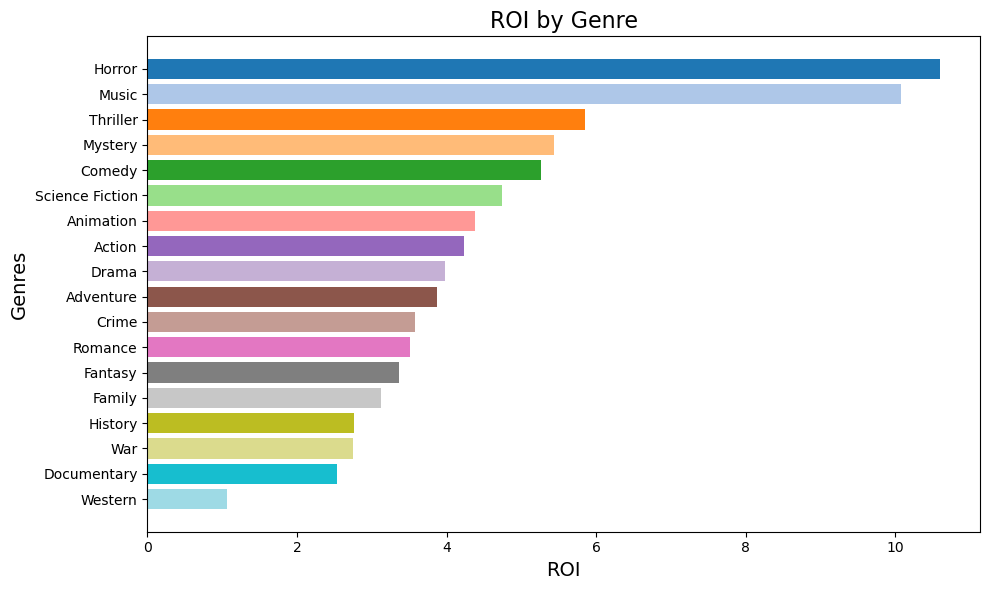

In [11]:
# Get unique genres and number of genres
unique_genres = genre_revenue_ratio['genres'].unique()
num_genres = len(unique_genres)

# Create a colormap for unique colors (e.g., 'tab20' for distinct colors)
colormap = cm.get_cmap('tab20', num_genres)

# Bar plot for the top genres with unique colors
plt.figure(figsize=(10, 6))

# Use a distinct color for each genre
for i, genre in enumerate(unique_genres):
    genre_data = genre_revenue_ratio[genre_revenue_ratio['genres'] == genre]
    plt.barh(genre_data['genres'], genre_data['roi'], color=colormap(i / num_genres), label=genre)

# Title and labels
plt.title('ROI by Genre', fontsize=16)
plt.xlabel('ROI', fontsize=14)
plt.ylabel('Genres', fontsize=14)

# Invert y-axis to show the highest on top
plt.gca().invert_yaxis()

# Adjust layout to fit the labels
plt.tight_layout()

# Show plot
plt.show()

## Visual 2
### Number of Movies by Genre

C:\Users\jeffb\AppData\Local\Temp\ipykernel_23512\2084036617.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', num_genres)


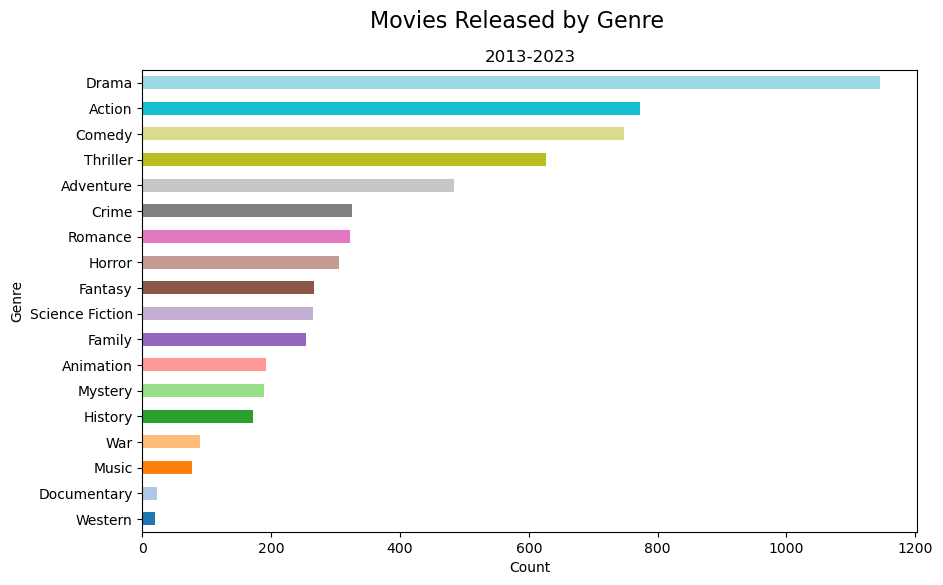

In [17]:
# # Chart the number of movies made in each genre
# sum the number of movies made by genre
vis_2_df = tmdb_df_exploded['genres'].value_counts()
num_genres = len(vis_2_df)
colormap = cm.get_cmap('tab20', num_genres)

# Plot the horizontal bar chart with different colors for each bar
vis_2_df.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color=colormap(range(num_genres)))
plt.xlabel('Count')
plt.ylabel('Genre')
plt.suptitle('Movies Released by Genre', fontsize=16)
plt.title('2013-2023', fontsize=12)
plt.show()


## Visual 3
#### Genre and Revenue Analysis

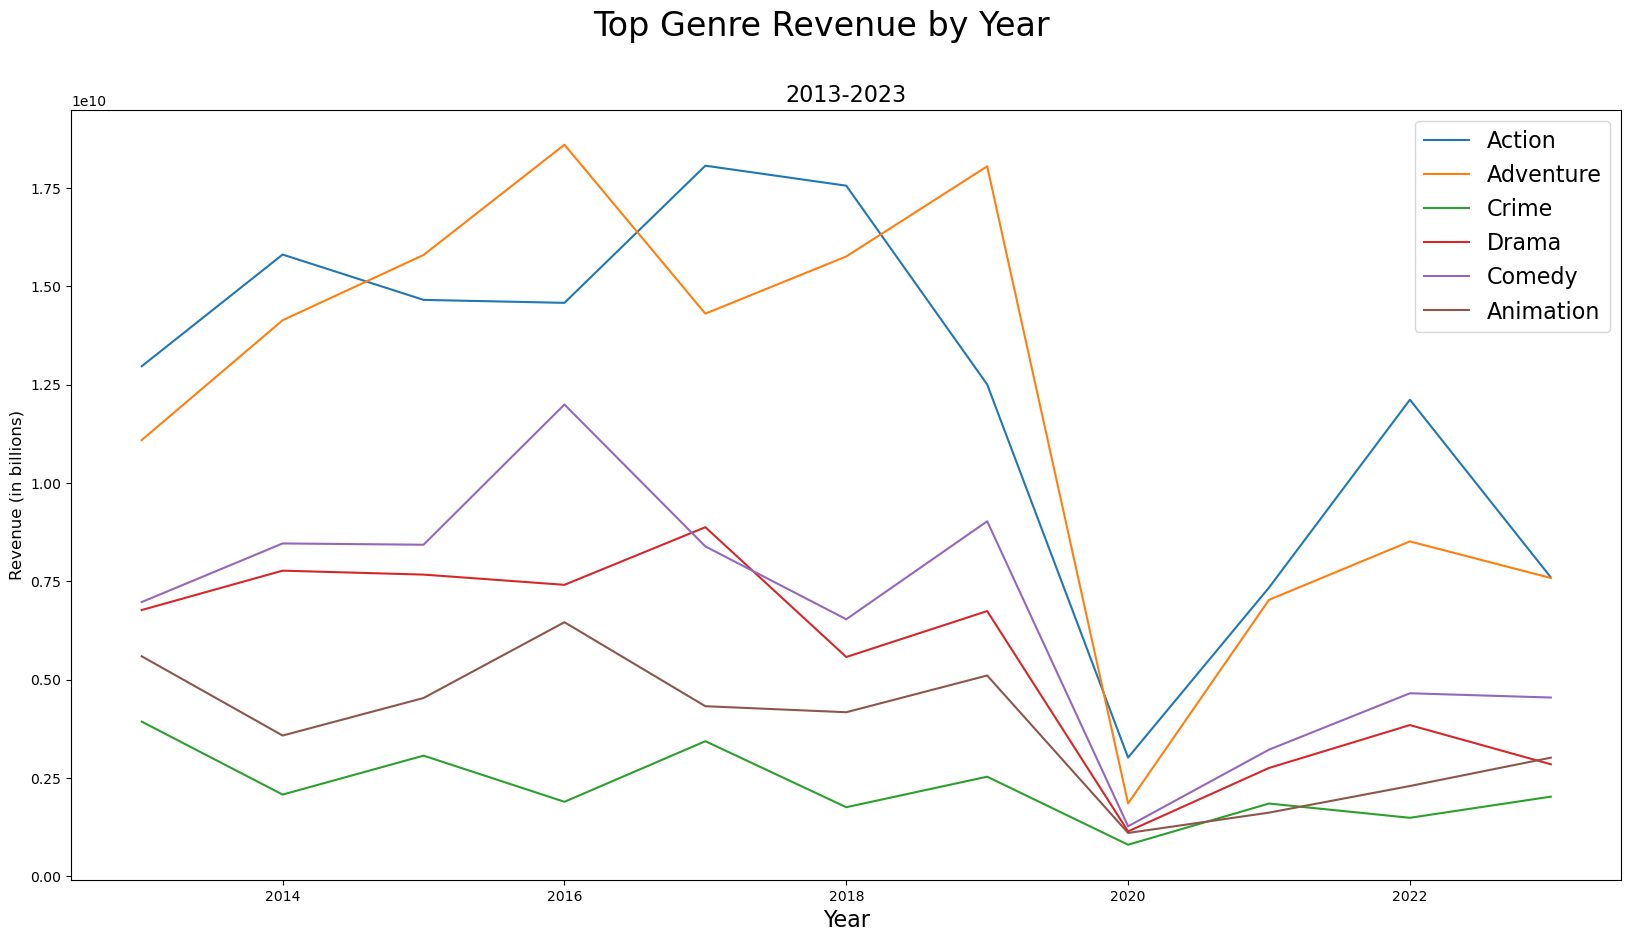

In [ ]:
# group data
# plot_1_df = tmdb_df_exploded.groupby(['year', 'genres'])['revenue'].sum().unstack(fill_value=0)
# display(plot_1_df)
result_df = tmdb_df_exploded.groupby(['year','genres'])['revenue'].sum()
result_df

new_result_df = pd.DataFrame(result_df)
# new_result_df.head(50)
# Total Revenue for each Genre by Year
pivot_df = new_result_df.reset_index().pivot(index='year', columns='genres', values='revenue')
pivot_df

top_genres = ['Action', 'Adventure', 'Crime', 'Drama', 'Comedy', 'Animation']
pivot_df[top_genres].plot(figsize=(20, 10))

plt.xlabel('Year', fontsize=16)
plt.ylabel('Revenue (in billions)', fontsize=12)
plt.suptitle('Top Genre Revenue by Year', fontsize=24)
plt.title('2013-2023', fontsize=16)
plt.legend(fontsize=16)
plt.show()


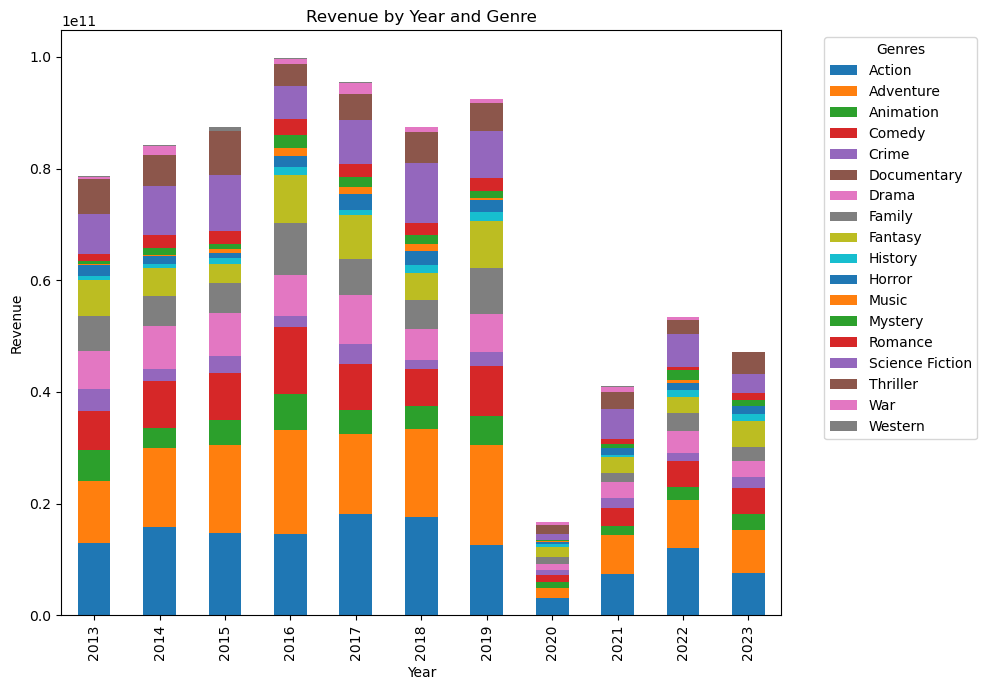

In [32]:
# show the revenue by year and genre

# Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
# pivot_df.plot(kind='line', stacked=True, figsize=(14, 8))
# plt.title('Revenue by Year and Genre')
# plt.xlabel('Year')
# plt.ylabel('Revenue')
# plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

## Visual 4
#### Genre Combinations

In [35]:
# # Build a list of tuples that assigns a value to each genre
# # By using tuples the values are immutable
genre_map = [
    ('Action', 1),
    ('Adventure', 2),
    ('Animation', 3),
    ('Comedy', 4),
    ('Crime', 5),
    ('Documentary', 6),
    ('Drama', 7),
    ('Family', 8),
    ('Fantasy', 9),
    ('History', 10),
    ('Horror', 11),
    ('Music', 12),
    ('Mystery', 13),
    ('Romance', 14),
    ('Science Fiction', 15),
    ('TV Movie', 16),
    ('Thriller', 17),
    ('War', 18),
    ('Western', 19)
]

# Use comprehensions and lamdba to convert genres to their corresponding values

tmdb_df['genres_mapped'] = tmdb_df['genres'].apply(lambda genres: [value for genre in genres for key, value in genre_map if genre == key])

# Display the result
print(tmdb_df['genres'].head())

41185                           [Documentary]
17050    [Animation, Action, Science Fiction]
5930                                  [Drama]
3537                        [Horror, Fantasy]
3284                 [Drama, Fantasy, Family]
Name: genres, dtype: object


In [36]:
from collections import Counter
# Flatten the list of combinations
flattened_genres = [tuple(sorted(genre)) for genres in tmdb_df['genres_mapped'] for genre in [genres]]

# Use Counter to count the frequency of each combination
genre_combinations_count = Counter(flattened_genres)

# Convert the Counter object to a DataFrame for better visualization
genre_combinations_df = pd.DataFrame(genre_combinations_count.items(), columns=['genres', 'frequency'])

# Display the DataFrame
print(genre_combinations_df)

             genres  frequency
0              (6,)         12
1        (1, 3, 15)          3
2              (7,)        166
3           (9, 11)          4
4         (7, 8, 9)          3
..              ...        ...
419  (2, 4, 12, 14)          1
420     (9, 12, 14)          1
421  (2, 4, 13, 14)          1
422     (7, 13, 19)          1
423   (1, 7, 8, 17)          1

[424 rows x 2 columns]


In [37]:
# Sort and view to confirm code worked
genre_combinations_df = genre_combinations_df.sort_values('frequency', ascending=False)
genre_combinations_df.head()

,genres,frequency
2,"(7,)",166
20,"(4,)",118
5,"(1, 7)",98
7,"(4, 7)",96
29,"(7, 14)",84


In [38]:
# Add back the list of genre strings for readability
genre_remap = {
    1: 'Action',
    2: 'Adventure',
    3: 'Animation',
    4: 'Comedy',
    5: 'Crime',
    6: 'Documentary',
    7: 'Drama',
    8: 'Family',
    9: 'Fantasy',
    10: 'History',
    11: 'Horror',
    12: 'Music',
    13: 'Mystery',
    14: 'Romance',
    15: 'Science Fiction',
    16: 'TV Movie',
    17: 'Thriller',
    18: 'War',
    19: 'Western'
}
# Use comprehensions and lambda to convert genres back to strings for ease of analysis
genre_combinations_df['genres_mapped'] = genre_combinations_df['genres'].apply(lambda genres: [genre_remap[genre] for genre in genres])

# Display the result
print(genre_combinations_df.head(10))

         genres  frequency                         genres_mapped
2          (7,)        166                               [Drama]
20         (4,)        118                              [Comedy]
5        (1, 7)         98                       [Action, Drama]
7        (4, 7)         96                       [Comedy, Drama]
29      (7, 14)         84                      [Drama, Romance]
77   (1, 2, 15)         71  [Action, Adventure, Science Fiction]
25     (11, 17)         66                    [Horror, Thriller]
54      (4, 14)         55                     [Comedy, Romance]
133     (7, 10)         55                      [Drama, History]
79   (1, 5, 17)         53             [Action, Crime, Thriller]


In [39]:
genre_combinations_df = genre_combinations_df.sort_values('frequency', ascending=False)
print(genre_combinations_df.head(20))

           genres  frequency                           genres_mapped
2            (7,)        166                                 [Drama]
20           (4,)        118                                [Comedy]
5          (1, 7)         98                         [Action, Drama]
7          (4, 7)         96                         [Comedy, Drama]
29        (7, 14)         84                        [Drama, Romance]
77     (1, 2, 15)         71    [Action, Adventure, Science Fiction]
25       (11, 17)         66                      [Horror, Thriller]
54        (4, 14)         55                       [Comedy, Romance]
133       (7, 10)         55                        [Drama, History]
79     (1, 5, 17)         53               [Action, Crime, Thriller]
12   (11, 13, 17)         46             [Horror, Mystery, Thriller]
52        (1, 17)         45                      [Action, Thriller]
11     (4, 7, 14)         45                [Comedy, Drama, Romance]
30   (2, 3, 4, 8)         34  [Adv

In [40]:
print(genre_combinations_df['frequency'].sum())

2443


In [41]:
# Convert the 'genres' column from lists to strings
genre_combinations_df['genres_str'] = genre_combinations_df['genres_mapped'].apply(lambda x: ', '.join(x))

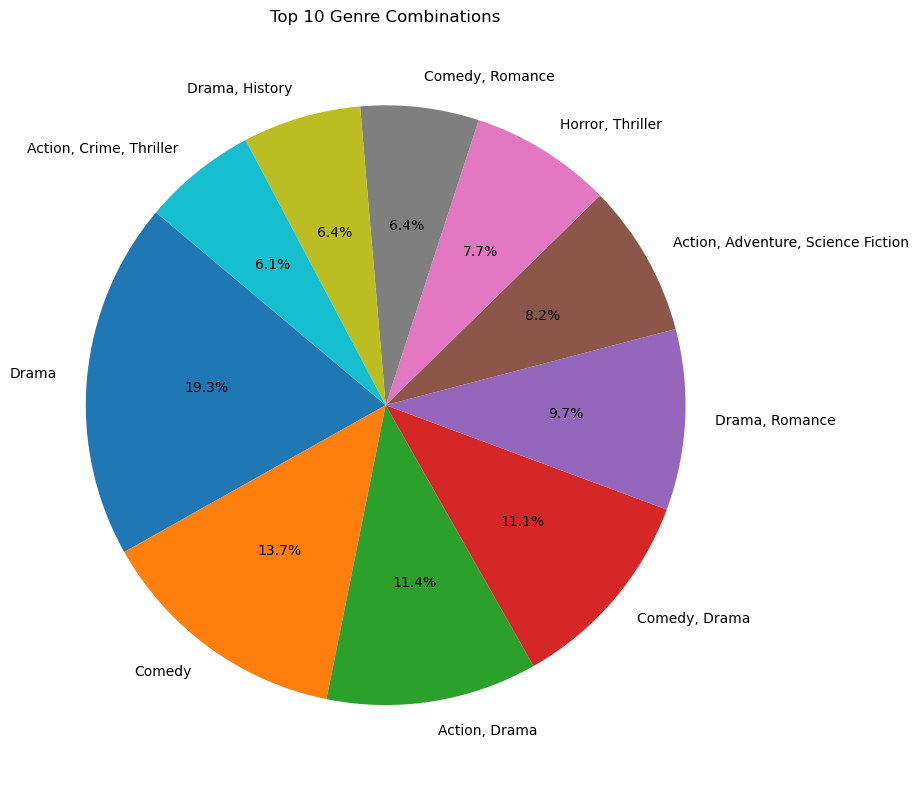

In [43]:
# Sort the DataFrame by frequency in descending order and select the top 10 results
top_10_df = genre_combinations_df.sort_values(by='frequency', ascending=False).head(10)

# Create a figure and set the size
plt.figure(figsize=(12, 8))

# Create a pie chart
plt.pie(top_10_df['frequency'], labels=top_10_df['genres_str'], autopct='%1.1f%%', startangle=140)

# Define the title
plt.title('Top 10 Genre Combinations')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Visuals 5, 6 & 7
#### Bayesian Average

In [44]:
# import dependencies
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json
import subprocess
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
tmdb_df = pd.read_csv('tmdb_df.csv')
tmdb_df.head(5)

,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2014,4.25
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,"Action, Adventure, Comedy","superhero, anti hero, mercenary, based on comi...",2016,13.50
2,6,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"Adventure, Action, Science Fiction","sacrifice, magic, superhero, based on comic, s...",2018,6.84
3,8,7.906,26638,2014-07-30,772776600,121,170000000,tt2015381,33.255,"Action, Science Fiction, Adventure","spacecraft, based on comic, space, orphan, adv...",2014,4.55
4,15,8.263,23857,2019-04-24,2800000000,181,356000000,tt4154796,91.756,"Adventure, Science Fiction, Action","superhero, time travel, space travel, time mac...",2019,7.87


In [46]:
working_df = tmdb_df[['vote_average', 'vote_count', 'revenue', 'budget', 'imdb_id', 'roi']]
working_df.head(5)

,vote_average,vote_count,revenue,budget,imdb_id,roi
0,8.417,32571,701729206,165000000,tt0816692,4.25
1,7.606,28894,783100000,58000000,tt1431045,13.50
2,8.255,27713,2052415039,300000000,tt4154756,6.84
3,7.906,26638,772776600,170000000,tt2015381,4.55
4,8.263,23857,2800000000,356000000,tt4154796,7.87


In [47]:
working_df.dtypes

vote_average    float64
vote_count        int64
revenue           int64
budget            int64
imdb_id          object
roi             float64
dtype: object

In [48]:
working_df = working_df[working_df['revenue'].notna() & (working_df['revenue'] != 0)]
working_df = working_df[working_df['budget'].notna() & (working_df['budget'] != 0)]
working_df = working_df[working_df['vote_average'].notna() & (working_df['vote_average'] != 0)]
working_df = working_df[working_df['vote_count'].notna() & (working_df['vote_count'] != 0)]

In [49]:
#Bayesian average is a statistical method used to estimate the true rating of a movie, 
#taking into account both the average rating and the number of votes. 
#It helps mitigate the impact of outliers and provides a more reliable estimate.

# Bayesian Average = (vote_count * vote_average + min_count * mean) / (vote_count + min_count)
# v is the number of votes for the movie
# R is the average rating of the movie   
# m is the minimum votes required to be listed in the chart
# C is the mean vote across the whole dataset

C = working_df['vote_average'].mean()
m = working_df['vote_count'].quantile(0.75)


def weighted_rating(x):
    # Add a small epsilon to prevent division by zero
    epsilon = 1e-10
    v = x['vote_count']
    R = x['vote_average']
    
    # Compute the weighted rating safely
    denominator = v + m + epsilon
    return (v / denominator * R) + (m / denominator * C)

working_df.loc[:, 'weighted_rating'] = working_df.apply(weighted_rating, axis=1)

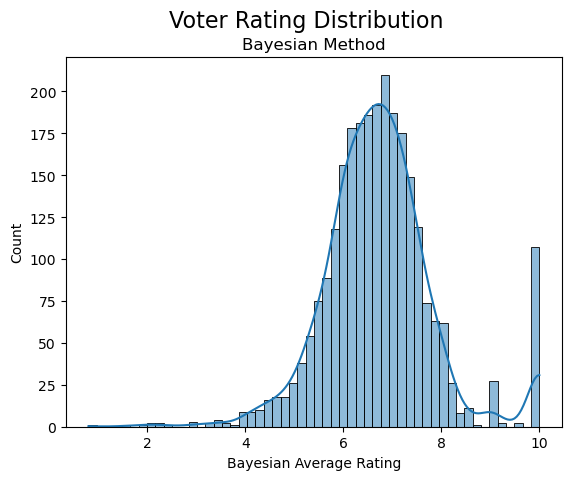

In [69]:
# Visualize the distribution of Bayesian average ratings
sns.histplot(working_df['vote_average'], kde=True)
plt.suptitle('Voter Rating Distribution', fontsize=16)
plt.title('Bayesian Method', fontsize=12)
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Count')
plt.show()

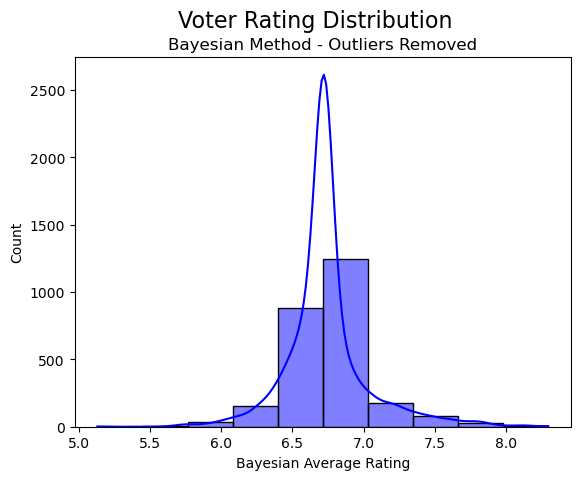

In [70]:
# Visualize the distribution of Bayesian average ratings
sns.histplot(working_df['weighted_rating'], kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Bayesian Average Ratings')
plt.suptitle('Voter Rating Distribution', fontsize=16)
plt.title('Bayesian Method - Outliers Removed', fontsize=12)
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Count')
plt.show()

In [52]:
import requests

def get_movie_name(imdb_id):
    # Base URL for the OMDb API
    base_url = "http://www.omdbapi.com/"
    api_key = "c1d0cce2"
    
    # Parameters for the API call
    params = {
        'i': imdb_id,  # IMDb ID
        'apikey': api_key  # Your API Key
    }
    
    # Make the GET request
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Parse JSON response
        if data.get("Response") == "True":
            return data.get("Title")  # Return the movie name
        else:
            return f"Error: {data.get('Error')}"  # Return error message from API
    else:
        return f"HTTP Error: {response.status_code}"


C:\Users\jeffb\AppData\Local\Temp\ipykernel_23512\1795336443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weighted_rating', y='movie_name', data=top_10, palette=colors)
C:\Users\jeffb\AppData\Local\Temp\ipykernel_23512\1795336443.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='weighted_rating', y='movie_name', data=top_10, palette=colors)


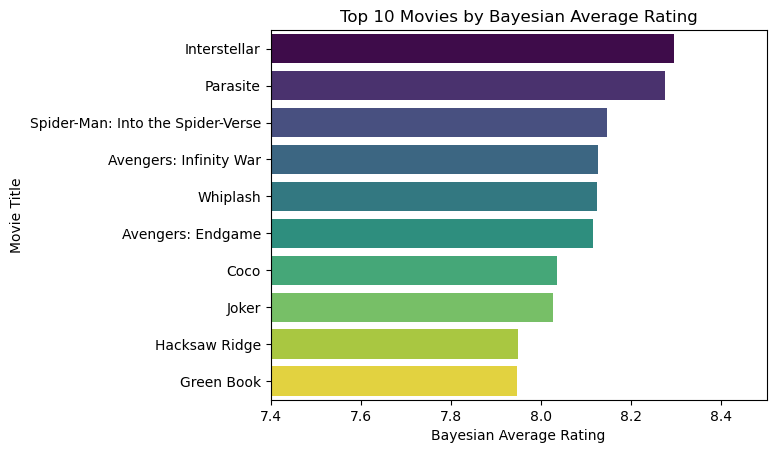

In [67]:
# Defining the top_10 movies
top_10 = working_df.sort_values('weighted_rating', ascending=False).head(10)
top_10['movie_name'] = top_10['imdb_id'].apply(lambda x: get_movie_name(x))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10)))

# Plotting
sns.barplot(x='weighted_rating', y='movie_name', data=top_10, palette=colors)
plt.title('Top 10 Movies by Bayesian Average Rating')
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Movie Title')
plt.xlim(7.4, 8.5)
# # Customize the x-axis scale
# ax.set_xticks(np.arange(0, max(top_10.values) + 1, 5))  # Example: ticks every 5 units
# ax.set_xticklabels(np.arange(0, max(top_10.values) + 1, 5), rotation=45)  # Rotate labels if needed



plt.show()